# Pymaceuticals Inc.
---

### Analysis

- The most effective drug regimens were Ramocane and Capomulin which both showed significantly decreased tumor volume over the 45 day testing period compared with the placebo.
- Least effective drug regimens were Ketapril followed by Naftasol and Stelasyn. These drug regimens showed a mean tumor volume greater than the placebo.
- The sex of the mice was relatively balanced with 51% male and 49% female mice across the study. 
- Deeper analysis of Capomulin, Ramicane, Infubinol, and Ceftamin showed consistent results across the sample mice with all four drugs. There was only one outlier in the Capomulin study and zero outliers in the other three drug regimens. 
- Further evaluation of tumor volume vs mouse weight in the Capomulin sample showed a very strong positive correlation (r-value of 0.84) between mouse weight and tumor volume. Further investigation would be helpful in evaluating if increased mouse weight has a causal relationship with tumor growth.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(study_results,mouse_metadata, how="left")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count=combined_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice=combined_df[combined_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse=combined_df[combined_df["Mouse ID"]=="g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df=combined_df[combined_df["Mouse ID"].str.contains("g989")==False]
cleaned_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=cleaned_mouse_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor_volume=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

 # Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({"Mean Tumor Volume":(mean_tumor_volume),
                        "Median Tumor Volume":(median_tumor_volume),
                        "Tumor Volume Variance":(tumor_volume_variance),
                        "Tumor Volume Std Dev":(tumor_volume_std),
                        "Tumor Volume Std Err":(tumor_volume_sem)})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"])
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

#### Using Pandas

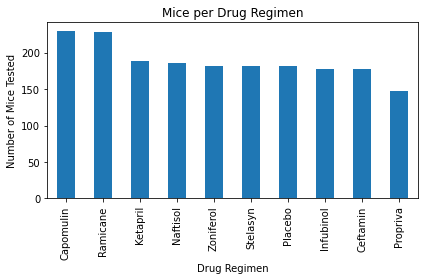

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen=cleaned_mouse_df.groupby("Drug Regimen")

mice_per_drug=drug_regimen["Timepoint"].count().sort_values(ascending=False)

mice_per_drug_chart=mice_per_drug.plot(kind="bar")
plt.title("Mice per Drug Regimen")
mice_per_drug_chart.set_ylabel("Number of Mice Tested")
plt.tight_layout()

plt.show()

#### Using pyplot

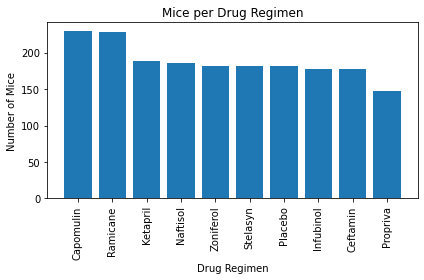

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(mice_per_drug))
regimen_name = list(mice_per_drug.index.values)
 
# Create bar chart
py_bar_mice_per_regimen = plt.bar(x_axis, mice_per_drug)

plt.xticks(x_axis, regimen_name,rotation="vertical")
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


plt.show()

#### Pie chart with pandas

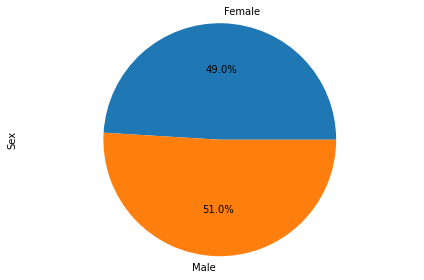

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Calculate number of mice for each sex
mouse_sex=cleaned_mouse_df.groupby("Sex")["Sex"].count()

#Generate pie plot
mice_pie=mouse_sex.plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.tight_layout()

plt.show()


#### Pie chart with pyplot

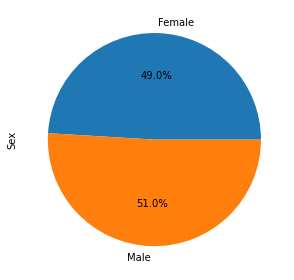

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_sex, labels=mouse_sex.index, autopct="%1.1f%%")
plt.tight_layout()
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_time=cleaned_mouse_df.groupby(["Drug Regimen","Mouse ID"]).last()[["Timepoint"]]
final_treatment_df=final_tumor_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df=pd.merge(final_treatment_df,cleaned_mouse_df,how='inner')
final_tumor_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol=final_tumor_df.loc[final_tumor_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    final_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles=final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers=final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)]
    
    #Print results
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} or above {round(upper_bound,2)} could be outliers.")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count()>0:
        for i in outliers.index:
            print(f"Outlier final tumor volume is {outliers[i]}")
   
    print('----------------------------------------------------------')
        
     

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 or above 51.83 could be outliers.
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 or above 54.31 could be outliers.
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 or above 82.74 could be outliers.
Number of outliers for Infubinol is: 1
Outlier final tumor volume is 36.321345799999996
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 or above 87.67 could be outliers.
Number of outliers for Ceftamin is: 0
----------------------------------------------------------


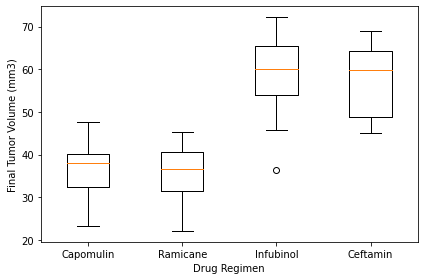

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot=plt.subplots()
final_tumor_plot.boxplot(final_vol_list, labels=treatment)

final_tumor_plot.set_xlabel("Drug Regimen")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)")

plt.tight_layout()
plt.show()


## Line and Scatter Plots

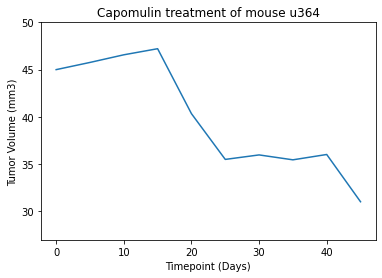

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse=cleaned_mouse_df.loc[cleaned_mouse_df["Mouse ID"]=="u364",:]

plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse u364")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(27,50)
plt.show()

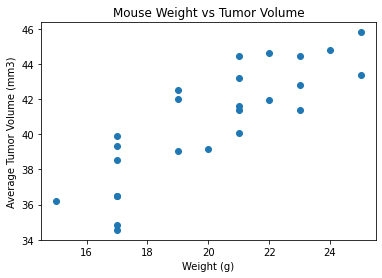

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Isolate the data for mice treated with Capomulin, calculate average weights & tumor volume
capomulin_df=cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]=="Capomulin"]
capomulin_grouped_df=capomulin_df.groupby("Mouse ID").mean()

#Add values to scatter plot
plt.scatter(capomulin_grouped_df["Weight (g)"],capomulin_grouped_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


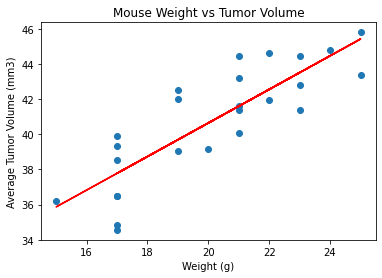

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Define x and y
x_values=capomulin_grouped_df["Weight (g)"]
y_values=capomulin_grouped_df["Tumor Volume (mm3)"]

#Calculate correlation
correlation=round(st.pearsonr(x_values,y_values)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

#Add linear regression to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values=x_values*slope+intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()